# What we often do in this use-case
    High level over-view..
    
   
    Note :->>
    
    We will solve most of those challenges that we often face in real world..
    we will focus primarily on each & every part of data science life-cycle..
    
    
     Life- Cycle of Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
        e) build machine leaning model & dump it..
        f) Automate ML Pipeline
        g) hypertune ml model..along with cross validation

    

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset
    Since data is in form of excel file we have to use pandas read_excel to load the data


In [5]:
rawdata=pd.read_excel(r"Data_Train.xlsx")
rawdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## 2.. Lets deal with missing values ..

In [6]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
rawdata.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
rawdata.dropna(inplace=True)

In [9]:
rawdata.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## 3.. Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"
        lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [10]:
data=rawdata.copy()

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
def change_into_Datetime(col):
  data[col]=pd.to_datetime(data[col])

In [13]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

<ipython-input-12-3ec80eb0396a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])
<ipython-input-12-3ec80eb0396a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col]=pd.to_datetime(data[col])
<ipython-input-12-3ec80eb0396a>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col]=pd.to_datetime(data[col])


In [14]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-20 05:50:00,2024-04-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-04-20 18:05:00,2024-04-20 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-04-20 16:50:00,2024-04-20 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


## 4.. Lets try to clean Dep_Time & Arrival_Time & then extract Derived attributes ..

In [16]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [17]:
extract_hour_min(data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-20 05:50:00,2024-04-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [18]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-20 05:50:00,2024-04-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [19]:
data.drop(["Arrival_Time","Dep_Time"],axis=1,inplace=True)

## 5.. lets analyse when will most of the flights take-off..

In [20]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

<Axes: xlabel='Dep_Time_hour'>

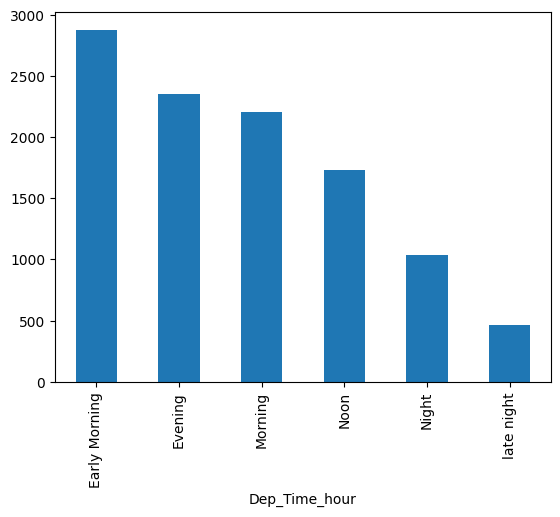

In [21]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

## 6.. Pre-process Duration Feature & extract meaningful features from it..

### Lets Apply pre-processing on duration column,
    -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values ,
    thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [22]:
def process_duration(col):
  if 'h' not in col:
    col='0h'+' '+col
  elif 'm' not in col:
    col=col+' '+'0m'
  return col

In [23]:
data['Duration']=data['Duration'].apply(process_duration)

In [24]:
data['Duration'].head(2)

0    2h 50m
1    7h 25m
Name: Duration, dtype: object

In [25]:
data['Duration_hours']=data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_minute']=data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [27]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [28]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


<Axes: xlabel='Duration_total_mins', ylabel='Price'>

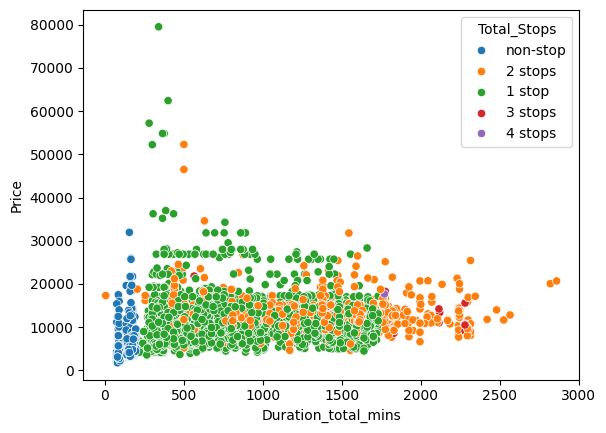

In [29]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

## 8.. on which route Jet Airways is extremely used?

In [30]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

## 9.. Applying one-hot Encoding on data..

'''

Categorical data refers to a data type that can be stored into groups/categories/labels
Examples of categorical variables are  age group, educational level,blood type etc..


Numerical data refers to the data that is in the form of numbers,
Examples of numerical data are height, weight, age etc..

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !
                  
For example, salary levels and performance classifications are discrete variables,
whereas height and weight are continuous variables.

'''

In [31]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [32]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,35,4,45,285,1,0,0,0,0


## 10.. Lets Perform target guided encoding on Data
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [34]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [35]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [36]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [37]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [38]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [39]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [40]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [41]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [42]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [43]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [44]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [45]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [46]:
data['Destination'] = data['Destination'].map(dict_dest)

In [47]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

## 11.. Perform Label(Manual) Encoding on Data

In [48]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [49]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [51]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [52]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### b.. Remove Un-necessary features

In [53]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minute', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [54]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [55]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year','Route','Duration',] , axis=1 , inplace=True)

In [73]:
data

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4107.0,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,4145.0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,7229.0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,12648.0,1,3,11,30,14,10,2,40,1,0,0,0,0


#Perform outlier detection !

CAUSE FOR OUTLIERS
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [56]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

<ipython-input-56-084838118417>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax1)
<ipython-input-56-084838118417>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax3 , kde=False)


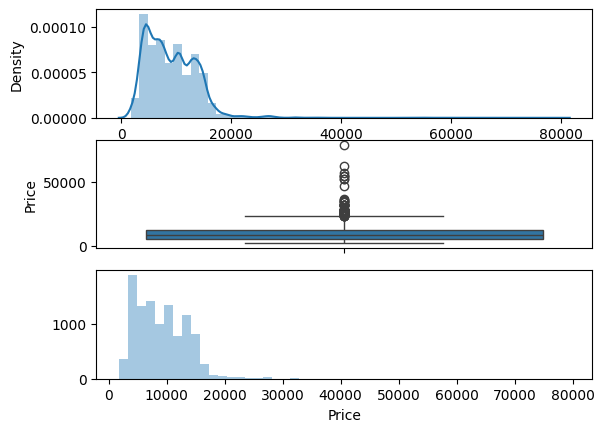

In [57]:
plot(data , 'Price')

        If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
        where ,  IQR = 75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR
          


In [58]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [59]:
len([price for price in data['Price'] if price> maximum or price<minimum])

94

#How to deal with Outlier

In [60]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

<ipython-input-56-084838118417>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax1)
<ipython-input-56-084838118417>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax3 , kde=False)


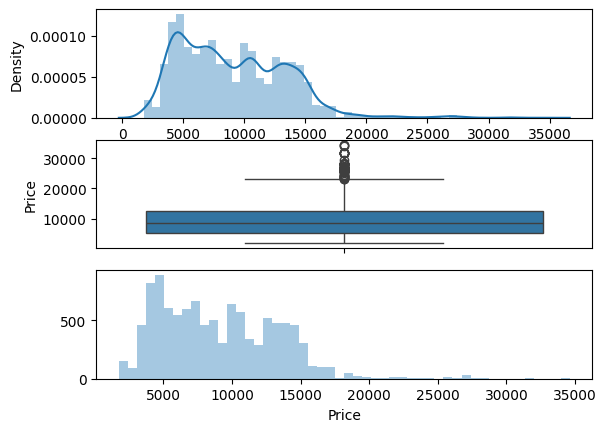

In [61]:
plot(data , 'Price')

# Feature Selection

In [62]:
X=data.drop(['Price'], axis=1)

In [64]:
y=data['Price']

In [65]:
from sklearn.feature_selection import mutual_info_regression

In [66]:
mir=mutual_info_regression(X,y)

In [67]:
mir

array([0.96893427, 1.00184565, 0.78390192, 0.227119  , 0.62676335,
       0.32856863, 0.26265597, 0.40666446, 0.36158489, 0.46867385,
       0.33799881, 0.38659894, 0.45870416, 0.52850402, 0.12981073,
       0.19795907])

In [68]:
imp_df = pd.DataFrame(mir, index=X.columns)

In [69]:
imp_df.columns = ['importance']

In [70]:
imp_df

,importance
Airline,0.968934
Destination,1.001846
Total_Stops,0.783902
Journey_day,0.227119
Journey_month,0.626763
Dep_Time_hour,0.328569
Dep_Time_minute,0.262656
Arrival_Time_hour,0.406664
Arrival_Time_minute,0.361585
Duration_hours,0.468674


# Build ML Model

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
model = RandomForestRegressor()

In [76]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
y_pred=model.predict(X_test)

In [79]:
y_pred

array([16875.84,  5322.19,  8945.56, ...,  3506.98,  6101.39,  6806.29])

In [81]:
from sklearn import metrics
metrics.r2_score(y_test , y_pred)

0.8113090789711557

# Hypertune ML Model

### Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model
    4.Check best parameters and best score

In [89]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [96]:
model_1=RandomForestRegressor()

In [90]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth' : max_depth ,
    'min_samples_split' : min_samples_split
}

In [97]:
from sklearn.model_selection import RandomizedSearchCV
## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


param_random = RandomizedSearchCV(estimator=model_1, param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [98]:
param_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [99]:
param_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [100]:
param_random.best_score_

0.810888554720151